In [4]:
import tensorflow as tf
import numpy as np

In [2]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(1000, 64, input_length=10))

2021-09-23 15:12:46.025963: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-23 15:12:46.026259: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-23 15:12:46.027754: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [5]:
input_array = np.random.randint(1000, size=(32, 10))
model.compile('rmsprop', 'mse')
output_array = model.predict(input_array)
print(output_array.shape)

(32, 10, 64)


2021-09-23 15:13:15.276379: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-23 15:13:15.298098: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2599990000 Hz


In [6]:
input_array

array([[507, 664,  18, 320, 318, 575, 973, 704, 625, 936],
       [ 62,  34, 247,  61, 941, 709, 279, 883, 989, 392],
       [847, 727, 336, 838, 727, 932, 398, 648, 532, 917],
       [273,  29, 394, 694, 720, 464,  61, 438,  23, 966],
       [120, 384, 970, 652, 934, 105, 345, 232,   7, 293],
       [857, 128, 300, 538, 499, 330, 609, 169, 790, 695],
       [770, 808, 708, 846, 861, 498, 234, 687, 123, 664],
       [975, 677, 405, 108,  35, 340, 324, 684, 811, 627],
       [410, 250, 579, 923, 884, 762, 939, 491,  89, 478],
       [  1, 327, 630, 618, 444, 254, 728, 615,  20, 960],
       [ 14, 674, 260, 300, 308, 238, 741, 367, 696, 481],
       [963, 723, 151, 447, 325, 755,  53, 148, 158, 603],
       [582, 810, 533, 821, 625, 276, 959, 372, 846, 589],
       [748, 412, 528, 904, 475, 723, 758, 763, 710, 564],
       [271, 793, 543, 204,  16, 538, 423,  80, 514, 754],
       [ 79, 918, 913, 325, 707, 717, 201, 658, 618, 540],
       [396, 436, 678, 769, 980, 637, 835, 487, 949, 158

In [16]:
(x_train,y_train),(_,_)=tf.keras.datasets.mnist.load_data()

import matplotlib.pyplot as plt
import PIL

fig = plt.figure(figsize=(4, 4))

<Figure size 288x288 with 0 Axes>

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
plot(x_train)

NameError: name 'plot' is not defined

NameError: name 'plt' is not defined

In [20]:
plt.show(x_train[1,:,:])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [19]:
x_train.shape

(60000, 28, 28)

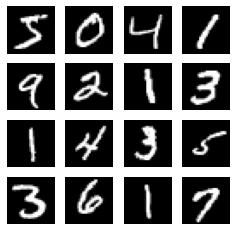

In [29]:
fig = plt.figure(figsize=(4, 4))

for i in range(16):
      plt.subplot(4, 4, i+1)
      plt.imshow(x_train[i, :, :] ,cmap='gray')
      plt.axis('off')

In [30]:
import tensorflow as tf


import numpy as np

from tensorflow.keras import layers



In [42]:
#G model
def make_generator_model(nb_classes=10,z_dim=100):
    model = tf.keras.Sequential()

    #latent input of size 100*?
    z_input=layers.Input(shape=(z_dim,))

    #label input of size 1*?
    y_input=layers.Input(shape=(1,))
    y_embeding=layers.Embedding(nb_classes,z_dim,input_length=1)(y_input)
    y_flatten=layers.Flatten()(y_embeding)

    joined=layers.multiply([z_input,y_flatten])


  

    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    #assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))

    img=model(joined)

    return tf.keras.Model([z_input,y_input],img)

In [43]:
generator = make_generator_model()
print(generator.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_8 (Embedding)         (None, 1, 100)       1000        input_16[0][0]                   
__________________________________________________________________________________________________
input_15 (InputLayer)           [(None, 100)]        0                                            
__________________________________________________________________________________________________
flatten_2 (Flatten)             (None, 100)          0           embedding_8[0][0]                
______________________________________________________________________________________________

In [56]:
def make_discriminator_model(nb_classes=10,img_shape=(28,28)):

    img_input=layers.Input(shape=img_shape)

    y_input=layers.Input(shape=(1,))
    y_embedding=layers.Embedding(nb_classes,np.prod(img_shape),input_length=1)(y_input)
    y_flatten=layers.Flatten()(y_embedding)
    y_reshape=layers.Reshape(img_shape)(y_flatten)

    concatenated=layers.Concatenate(axis=-1)([img_input,y_reshape])


    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 2]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))
    
    #prediction = model(concatenated)
    #return tf.keras.Model([img, label], prediction)
    
    return tf.keras.Model([img_input, y_input],model(concatenated))


In [57]:
discriminator = make_discriminator_model()
print(discriminator.summary())

ValueError: Input 0 of layer conv2d_14 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (None, 28, 56)

In [69]:

BATCH_SIZE = 256
EPOCHS = 5
noise_dim = 100

#import
(x_train,y_train),(_,_)=tf.keras.datasets.mnist.load_data()

#reshape and norm
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_train= ( x_train - 127.5 ) / 127.5

#suffle
dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(x_train.shape[0]).batch(BATCH_SIZE)


In [72]:
#list(dataset.as_numpy_iterator())


In [78]:
dataset = tf.data.Dataset.from_tensor_slices(([1,2,3],[4,5,6])).shuffle(3)


list(dataset.as_numpy_iterator())

[(3, 6), (1, 4), (2, 5)]

In [86]:
y_train.shape

(60000,)

In [87]:
x=x_train[0:10,:,:,:]
y=y_train[0:10]

In [88]:
y.shape

(10,)

In [90]:
y[0]

5

5
0
4
1
9
2
1
3
1
4


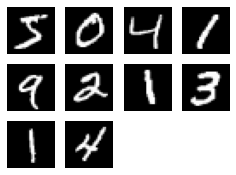

In [92]:
fig = plt.figure(figsize=(4, 4))

for i in range(10):
      plt.subplot(4, 4, i+1)
      plt.imshow(x[i, :, :] ,cmap='gray')
      plt.axis('off')
      print(y[i])

In [144]:
dataset = tf.data.Dataset.from_tensor_slices((x,y)).shuffle(10).batch(2)

dataset[0]
#list(dataset.as_numpy_iterator())

TypeError: 'BatchDataset' object is not subscriptable

[9 1]
[0 1]
[4 5]
[3 1]
[2 4]


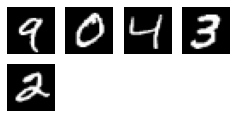

In [134]:
fig = plt.figure(figsize=(4, 4))
i=0
for img in dataset:
      plt.subplot(4, 4, i+1)
      plt.imshow(img[0][0] ,cmap='gray')
      plt.axis('off')
      print(img[1].numpy())
      i=i+1

In [117]:
#dataset = tf.data.Dataset.from_tensor_slices(y).shuffle(10)


list(dataset.as_numpy_iterator())

[1, 4, 3, 1, 1, 5, 2, 4, 0, 9]

In [172]:
seed = tf.concat(tf.random.normal([2, 10]).numpy(), [1,2] ,0)  

seed.numpy()

ValueError: Shape (2,) must have rank 0

In [166]:
t1 = [[1, 2, 3], [4, 5, 6]]
t2 = [[7, 8, 9], [10, 11, 12]]
tf.concat([t1, t2], 1)

<tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]], dtype=int32)>

In [188]:
t1=tf.random.normal([2, 10])
#t1.numpy()

In [183]:
t2=[[1],[2]]
t2

[[1], [2]]

In [189]:
tf.concat([t1,t2],1).numpy()

array([[-0.01890703, -0.68313026, -3.255679  , -0.2850179 ,  3.2893863 ,
        -0.5482814 , -0.36495897,  0.16948575,  0.94409573, -0.48369777,
         1.        ],
       [ 0.9350308 ,  0.10259638, -0.0215939 , -2.410649  , -0.87926817,
        -1.2634056 ,  0.4340678 ,  0.5968908 ,  0.11688186, -0.42029238,
         2.        ]], dtype=float32)

In [187]:
range(0,10)

range(0, 10)